In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp
from lifelines import KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts

sns.set_palette('colorblind')
sns.set_style('white') 
palette = sns.color_palette('colorblind', 6)

In [214]:
# Read and sort the result by high ks_statistic
ks_result = pd.read_csv(f'./result3/ks_All_1.csv', sep=',')
ks_result = ks_result[ks_result[f'ks_statistic_All'] != -np.inf]
ks_result

,gene,threshold_All,pvalue_All,ks_statistic_All,size_le,size_he
0,ENSG00000000003.15,0.014024,0.4321,0.0733,172.0,653.0
1,ENSG00000000005.6,0.000025,0.5868,0.0640,180.0,645.0
2,ENSG00000000419.13,0.004873,0.0533,0.9745,1.0,824.0
3,ENSG00000000457.14,0.001044,0.0436,0.9794,1.0,824.0
4,ENSG00000000460.17,0.000829,0.0436,0.9794,1.0,824.0
...,...,...,...,...,...,...
60654,ENSG00000288667.1,0.000004,0.5418,0.0831,724.0,101.0
60655,ENSG00000288669.1,0.000022,0.7134,0.2304,817.0,8.0
60656,ENSG00000288670.1,0.002675,0.6493,0.0571,216.0,609.0
60658,ENSG00000288674.1,0.000060,0.0834,0.0868,389.0,436.0


In [215]:
# Filter result with p-value <= 0.05
filtered_df = ks_result[ks_result['pvalue_All'] <= 0.05].sort_values(by=f'pvalue_All')
filtered_df

,gene,threshold_All,pvalue_All,ks_statistic_All,size_le,size_he
1777,ENSG00000088451.11,0.001395,0.00,0.9769,3.0,822.0
15108,ENSG00000181827.15,0.002803,0.00,0.9513,4.0,821.0
15564,ENSG00000183735.11,0.004969,0.00,0.9769,3.0,822.0
3426,ENSG00000107560.12,0.002058,0.00,0.9769,3.0,822.0
3393,ENSG00000107164.16,0.006022,0.00,0.9769,3.0,822.0
...,...,...,...,...,...,...
2232,ENSG00000100242.15,0.027112,0.05,0.1126,182.0,643.0
9288,ENSG00000150281.7,0.026112,0.05,0.6258,821.0,4.0
15524,ENSG00000183617.5,0.005263,0.05,0.1798,59.0,766.0
12511,ENSG00000169087.11,0.003594,0.05,0.1103,193.0,632.0


In [216]:
# Filter result with balanced number of sample in each group
x = 802 # arbitrary
filtered_df = filtered_df[abs(filtered_df['size_le'] - filtered_df['size_he']) <= x]
filtered_df

,gene,threshold_All,pvalue_All,ks_statistic_All,size_le,size_he
56343,ENSG00000280670.3,0.000437,0.0002,0.5467,14.0,811.0
8134,ENSG00000141552.18,0.017358,0.0004,0.2141,102.0,723.0
9186,ENSG00000149269.10,0.014269,0.0004,0.3840,28.0,797.0
15827,ENSG00000184887.13,0.013644,0.0005,0.3001,47.0,778.0
15664,ENSG00000184164.15,0.008092,0.0005,0.3747,29.0,796.0
...,...,...,...,...,...,...
43491,ENSG00000256849.1,0.000132,0.0500,0.1798,766.0,59.0
2232,ENSG00000100242.15,0.027112,0.0500,0.1126,182.0,643.0
15524,ENSG00000183617.5,0.005263,0.0500,0.1798,59.0,766.0
12511,ENSG00000169087.11,0.003594,0.0500,0.1103,193.0,632.0


In [217]:
# Get top gene lists
n = 10
gene_list = filtered_df.iloc[:n, 0].to_list()

In [221]:
def plot_distribution(list, real_val, gene, p_val):
    plt.figure(figsize=(6, 4))
    obs_color = palette[2]
    # min_color = palette[1]
    # max_color = palette[3]
    # Calculate min and max values
    # min = np.min(list)
    # max = np.max(list)
    # Plot histogram with KDE
    sns.histplot(list, bins=60, kde=True, edgecolor='black')
    plt.axvline(real_val, color=obs_color, linestyle='--', label=f'Observed KS statistic: {real_val:.4f}', linewidth=2) 
    # plt.axvline(min, color=min_color, linestyle='--', label=f'Min simulated KS statistic: {min:.4f}', linewidth=2)
    # plt.axvline(max, color=max_color, linestyle='--', label=f'Max simulated KS statistic: {max:.4f}', linewidth=2) 
    text = f'KS Statistic Estimated Null Distribution \n Gene: {gene_id_to_name.get(gene, gene)} (p = {p_val})' 
    plt.title(f'{text}', fontsize=10)
    plt.xlabel('Simulated KS statistic')
    plt.ylabel('Frequency')
    plt.legend(fontsize=8)
    plt.grid()
    plt.show()

def permutation_test(survival_time, gene, real_ks, num_simulation=1000):
    ks_stats_sim = []  
    ks_pvals_sim = []
    
    for _ in range(num_simulation):   
        # Select a random split index
        split_index = np.random.randint(1, len(survival_time)//2)

        # Shuffle the data
        shuffled_data = survival_time.copy()
        np.random.shuffle(shuffled_data)

        # Divide the data based on the split index
        group1 = shuffled_data[:split_index]
        group2 = shuffled_data[split_index:]

        # Calculate Dictance
        ks_stat_sim, ks_pval_sim = ks_2samp(group1, group2)
        ks_stats_sim.append(ks_stat_sim)
        ks_pvals_sim.append(ks_pval_sim)
    
    # Performing a one-sided test
    extreme_count = np.sum(np.array(ks_stats_sim) > real_ks)
    p_value = extreme_count / len(ks_stats_sim)

    # Plot simulation distribution
    plot_distribution(ks_stats_sim, real_ks, gene, p_value.round(6))

In [219]:
unified_data = pd.read_csv('/Users/tk/Desktop/Research-CITS5014/csv/unified_data.csv', sep=',', index_col=0)
unified_data.index.name = None

# Get survival time, status, and subtype from the dataframe
survival_time = pd.to_numeric(unified_data.iloc[-3].values, errors='coerce')
status = pd.to_numeric(unified_data.iloc[-2].values, errors='coerce')
subtypes = unified_data.iloc[-1].values

/var/folders/nn/n9lqp7fs1pq402h_v1c984h40000gn/T/ipykernel_73200/3281396134.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251

/Users/tk/opt/anaconda3/envs/gene/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


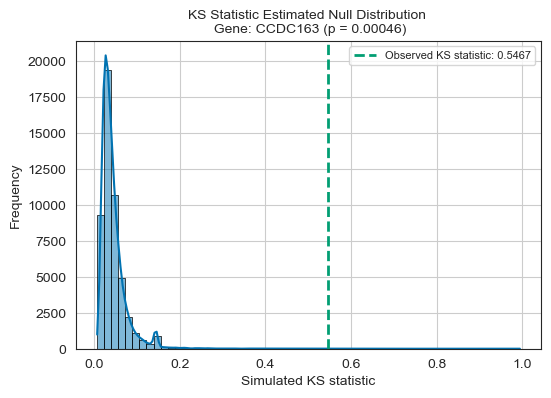

/Users/tk/opt/anaconda3/envs/gene/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


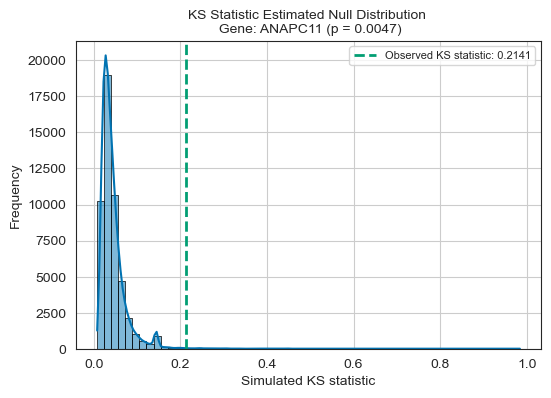

/Users/tk/opt/anaconda3/envs/gene/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


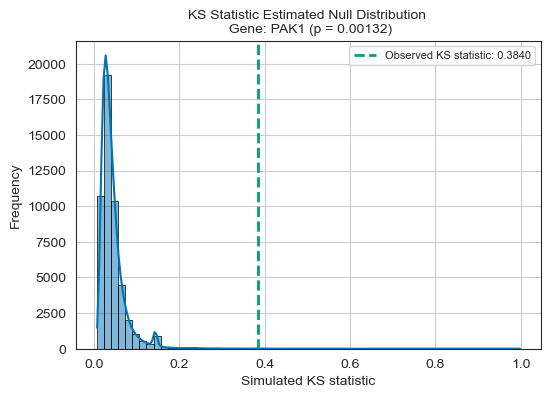

/Users/tk/opt/anaconda3/envs/gene/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


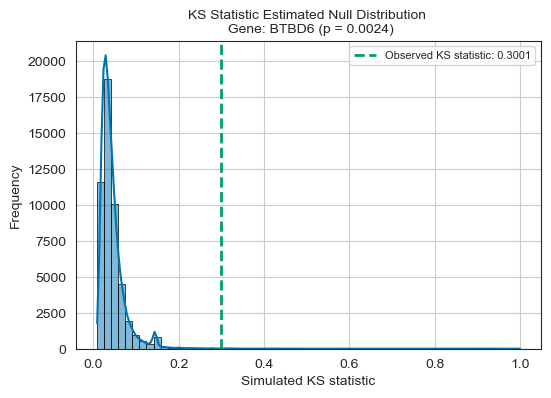

/Users/tk/opt/anaconda3/envs/gene/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


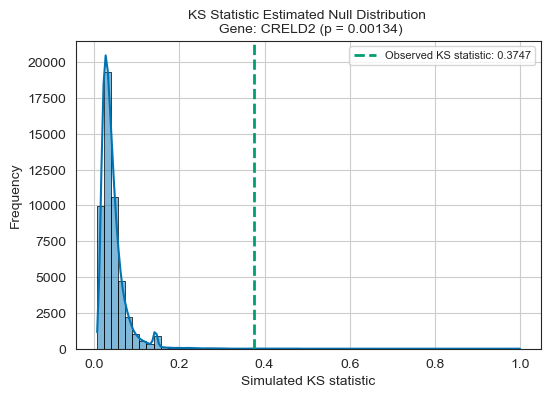

/Users/tk/opt/anaconda3/envs/gene/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


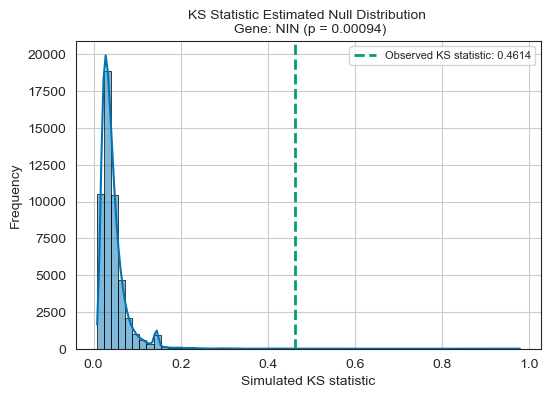

/Users/tk/opt/anaconda3/envs/gene/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


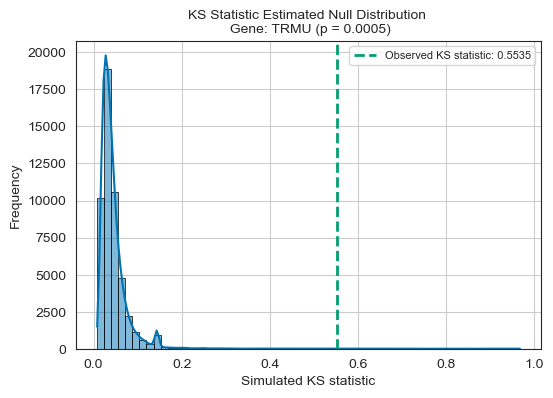

/Users/tk/opt/anaconda3/envs/gene/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


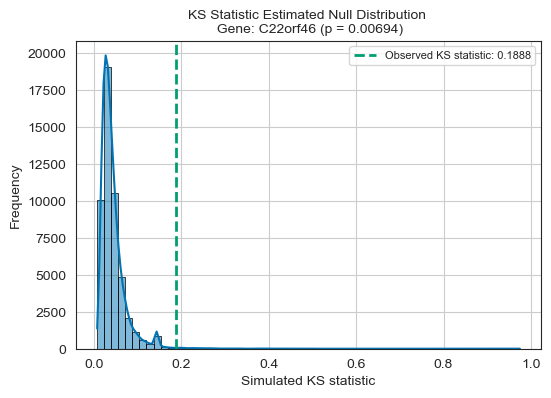

/Users/tk/opt/anaconda3/envs/gene/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


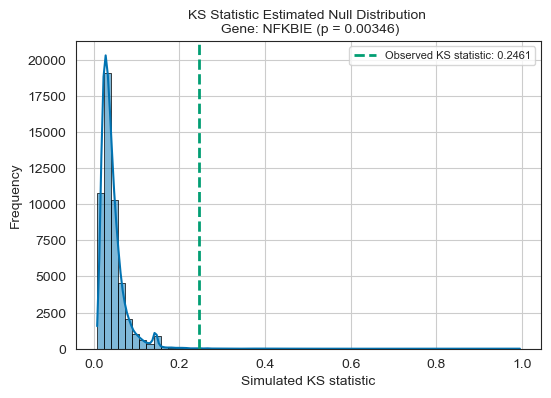

/Users/tk/opt/anaconda3/envs/gene/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


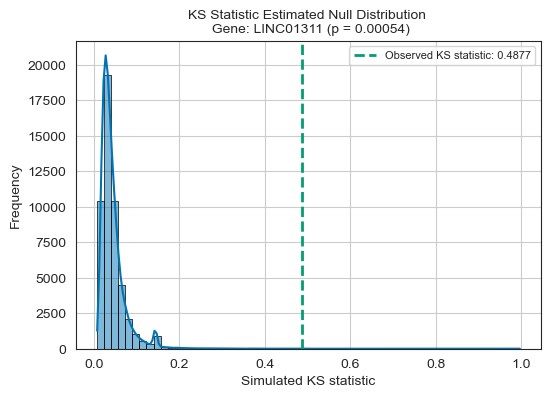

In [232]:
num_simulation = 50000
for gene in gene_list:
    ks_obs = filtered_df.loc[filtered_df['gene'] == gene, 'ks_statistic_All'].iloc[0]
    permutation_test(survival_time, gene, ks_obs, num_simulation)

In [235]:
def plot_distribution(list, real_val, gene, p_val):
    plt.figure(figsize=(6, 4))
    obs_color = palette[2]
    # min_color = palette[1]
    # max_color = palette[3]
    # Calculate min and max values
    # min = np.min(list)
    # max = np.max(list)
    # Plot histogram with KDE
    sns.histplot(list, bins=60, kde=True, edgecolor='black')
    plt.axvline(real_val, color=obs_color, linestyle='--', label=f'Observed KS statistic: {real_val:.4f}', linewidth=2) 
    # plt.axvline(min, color=min_color, linestyle='--', label=f'Min simulated KS statistic: {min:.4f}', linewidth=2)
    # plt.axvline(max, color=max_color, linestyle='--', label=f'Max simulated KS statistic: {max:.4f}', linewidth=2) 
    text = f'KS Statistic Estimated Null Distribution \n Gene: {gene_id_to_name.get(gene, gene)} (p = {p_val})' 
    plt.title(f'{text}', fontsize=10)
    plt.xlabel('Simulated KS statistic')
    plt.ylabel('Frequency')
    plt.legend(fontsize=8)
    plt.grid()
    plt.show()

def permutation_test(survival_time, gene, obs_stat, num_simulation=1000):
    jsd_sim = []  
    epsilon = 1e-10
    
    for _ in range(num_simulation):   
        # Select a random split index
        split_index = np.random.randint(1, len(survival_time)//2)

        # Shuffle the data
        shuffled_data = survival_time.copy()
        np.random.shuffle(shuffled_data)

        # Divide the data based on the split index
        group1 = shuffled_data[:split_index]
        group2 = shuffled_data[split_index:]

        # Combine both time groups to get all unique time values
        all_times = set(group1).union(set(group2))

        # Calculate the probability distribution for each group
        p = pd.Series(group1).value_counts(normalize=True).reindex(all_times, fill_value=0)
        q = pd.Series(group2).value_counts(normalize=True).reindex(all_times, fill_value=0)
        p = np.clip(p, epsilon, None)
        q = np.clip(q, epsilon, None)
      
        # Compute the average distribution
        m = 0.5 * (p + q)
        
        # Calculate KL Divergences
        KL_P_M = np.sum(p * np.log(p / m))
        KL_Q_M = np.sum(q * np.log(q / m))
        
        # Calculate JS divergence
        JSD = 0.5 * (KL_P_M + KL_Q_M)
        jsd_sim.append(JSD)
    
    # Performing a one-sided test
    extreme_count = np.sum(np.array(jsd_sim) > obs_stat)
    p_value = extreme_count / len(jsd_sim)

    # Plot simulation distribution
    plot_distribution(jsd_sim, obs_stat, gene, p_value.round(6))

/Users/tk/opt/anaconda3/envs/gene/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


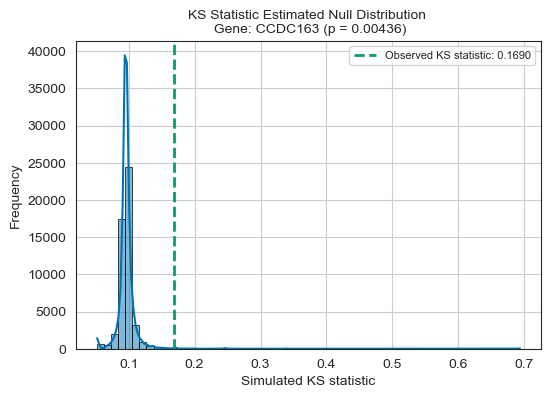

In [236]:
num_simulation = 50000
for gene in gene_list[:1]:
    ks_obs = 0.169
    permutation_test(survival_time, gene, ks_obs, num_simulation)

# Each subtype

/Users/tk/opt/anaconda3/envs/gene/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


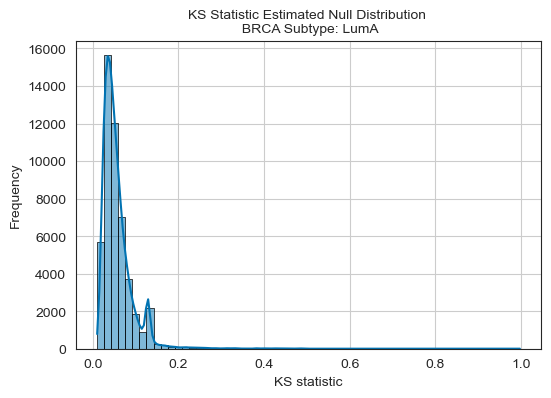

In [247]:
def plot_distribution(list, s):
    plt.figure(figsize=(6, 4))
    # obs_color = palette[2]
    # min_color = palette[1]
    # max_color = palette[3]
    # Calculate min and max values
    # min = np.min(list)
    # max = np.max(list)
    # Plot histogram with KDE
    sns.histplot(list, bins=60, kde=True, edgecolor='black')
    # plt.axvline(real_val, color=obs_color, linestyle='--', label=f'Observed KS statistic: {real_val:.4f}', linewidth=2) 
    # plt.axvline(min, color=min_color, linestyle='--', label=f'Min simulated KS statistic: {min:.4f}', linewidth=2)
    # plt.axvline(max, color=max_color, linestyle='--', label=f'Max simulated KS statistic: {max:.4f}', linewidth=2) 
    text = f'KS Statistic Estimated Null Distribution \n BRCA Subtype: {s}' 
    plt.title(f'{text}', fontsize=10)
    plt.xlabel('KS statistic')
    plt.ylabel('Frequency')
    plt.grid()

def permutation_test(survival_time, num_simulation, subtype):
    ks_stats_sim = []  
    ks_pvals_sim = []
    
    for _ in range(num_simulation):
        # Subtype masking
        mask = (subtypes == subtype)
        time = survival_time[mask]
          
        # Select a random split index
        split_index = np.random.randint(1, len(time)//2)

        # Shuffle the data
        shuffled_data = time.copy()
        np.random.shuffle(shuffled_data)

        # Divide the data based on the split index
        group1 = shuffled_data[:split_index]
        group2 = shuffled_data[split_index:]

        # Calculate Dictance
        ks_stat_sim, ks_pval_sim = ks_2samp(group1, group2)
        ks_stats_sim.append(ks_stat_sim)
        ks_pvals_sim.append(ks_pval_sim)
    
    # Performing a one-sided test
    # extreme_count = np.sum(np.array(ks_stats_sim) > real_ks)
    # p_value = extreme_count / len(ks_stats_sim)

    # Plot simulation distribution
    plot_distribution(ks_stats_sim, s)

s = "LumA" 
permutation_test(survival_time, num_simulation, s)

/Users/tk/opt/anaconda3/envs/gene/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


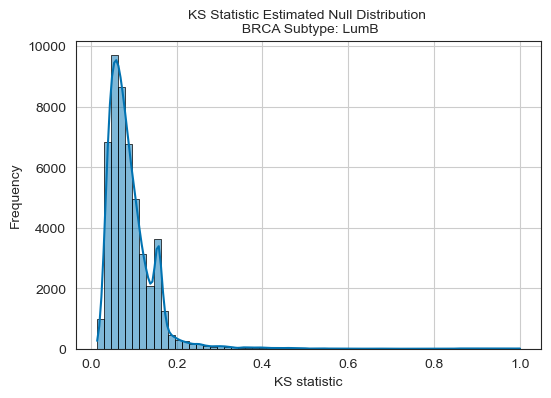

In [248]:
s = "LumB" 
permutation_test(survival_time, num_simulation, s)

/Users/tk/opt/anaconda3/envs/gene/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


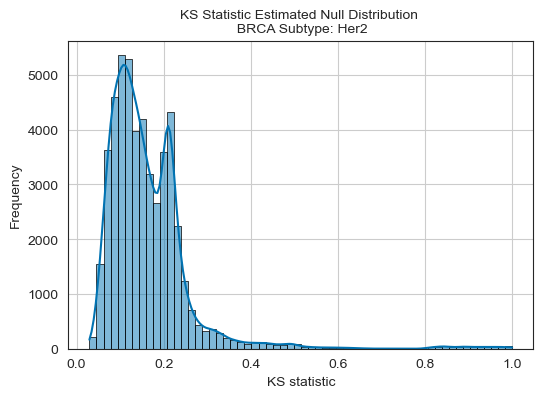

In [249]:
s = "Her2" 
permutation_test(survival_time, num_simulation, s)

/Users/tk/opt/anaconda3/envs/gene/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


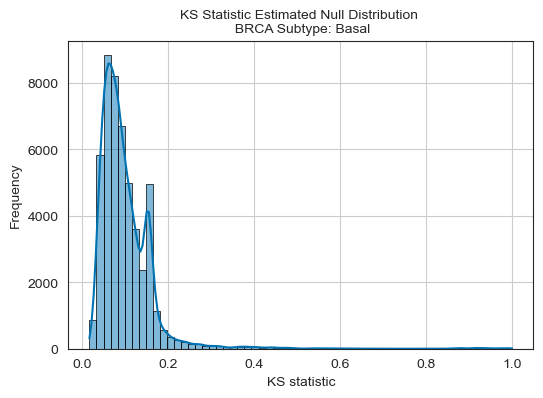

In [250]:
s = "Basal" 
permutation_test(survival_time, num_simulation, s)

/Users/tk/opt/anaconda3/envs/gene/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


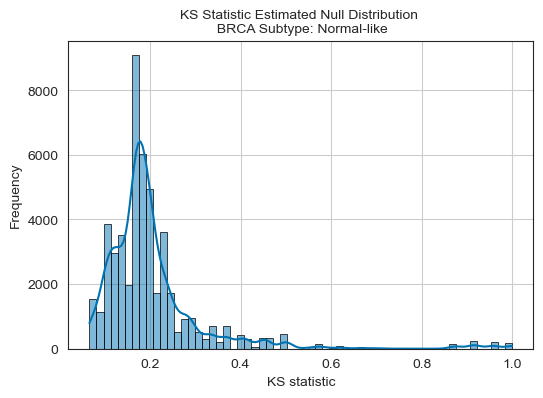

In [252]:
s = "Normal-like" 
permutation_test(survival_time, num_simulation, s)

/Users/tk/opt/anaconda3/envs/gene/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


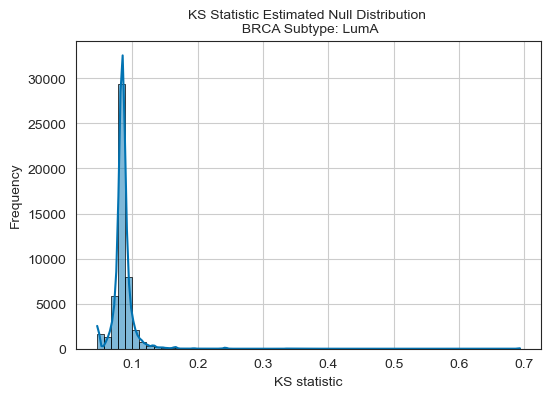

In [255]:
def plot_distribution(list, s):
    plt.figure(figsize=(6, 4))
    # obs_color = palette[2]
    # min_color = palette[1]
    # max_color = palette[3]
    # Calculate min and max values
    # min = np.min(list)
    # max = np.max(list)
    # Plot histogram with KDE
    sns.histplot(list, bins=60, kde=True, edgecolor='black')
    # plt.axvline(real_val, color=obs_color, linestyle='--', label=f'Observed KS statistic: {real_val:.4f}', linewidth=2) 
    # plt.axvline(min, color=min_color, linestyle='--', label=f'Min simulated KS statistic: {min:.4f}', linewidth=2)
    # plt.axvline(max, color=max_color, linestyle='--', label=f'Max simulated KS statistic: {max:.4f}', linewidth=2) 
    text = f'KS Statistic Estimated Null Distribution \n BRCA Subtype: {s}' 
    plt.title(f'{text}', fontsize=10)
    plt.xlabel('KS statistic')
    plt.ylabel('Frequency')
    plt.grid()

def permutation_test(survival_time, num_simulation, subtype):
    jsd_sim = []  
    epsilon = 1e-10
    
    for _ in range(num_simulation):
        # Subtype masking
        mask = (subtypes == subtype)
        time = survival_time[mask]

        # Select a random split index
        split_index = np.random.randint(1, len(time)//2)

        # Shuffle the data
        shuffled_data = time.copy()
        np.random.shuffle(shuffled_data)

        # Divide the data based on the split index
        group1 = shuffled_data[:split_index]
        group2 = shuffled_data[split_index:]

        # Combine both time groups to get all unique time values
        all_times = set(group1).union(set(group2))

        # Calculate the probability distribution for each group
        p = pd.Series(group1).value_counts(normalize=True).reindex(all_times, fill_value=0)
        q = pd.Series(group2).value_counts(normalize=True).reindex(all_times, fill_value=0)
        p = np.clip(p, epsilon, None)
        q = np.clip(q, epsilon, None)
      
        # Compute the average distribution
        m = 0.5 * (p + q)
        
        # Calculate KL Divergences
        KL_P_M = np.sum(p * np.log(p / m))
        KL_Q_M = np.sum(q * np.log(q / m))
        
        # Calculate JS divergence
        JSD = 0.5 * (KL_P_M + KL_Q_M)
        jsd_sim.append(JSD)

    # Plot simulation distribution
    plot_distribution(jsd_sim, s)

s = "LumA" 
permutation_test(survival_time, num_simulation, s)

/Users/tk/opt/anaconda3/envs/gene/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


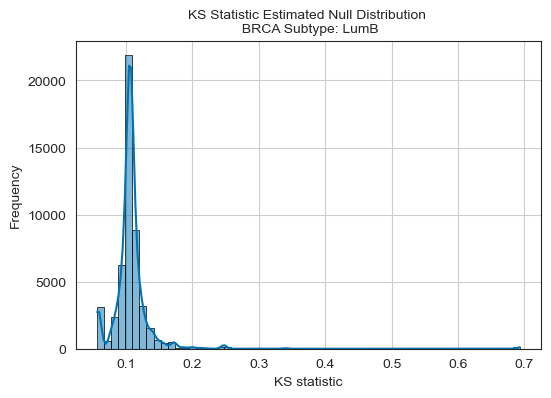

In [256]:
s = "LumB" 
permutation_test(survival_time, num_simulation, s)

/Users/tk/opt/anaconda3/envs/gene/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


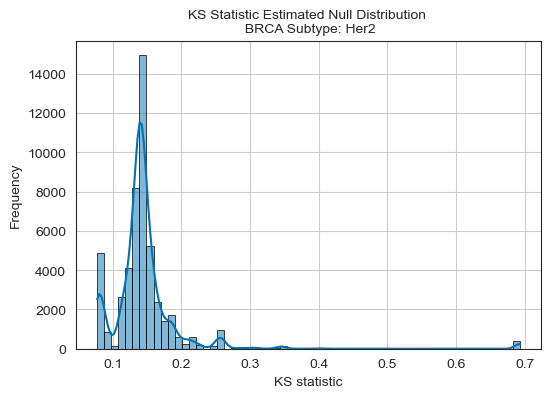

In [257]:
s = "Her2" 
permutation_test(survival_time, num_simulation, s)

/Users/tk/opt/anaconda3/envs/gene/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


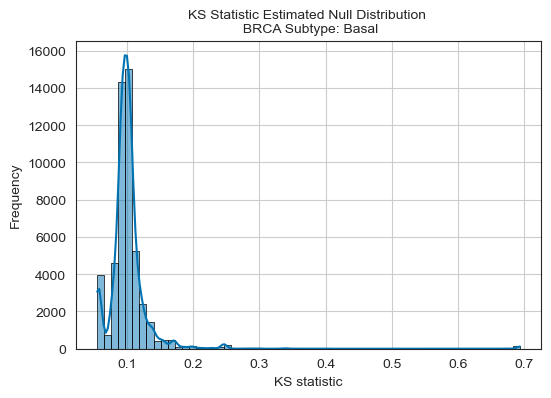

In [258]:
s = "Basal" 
permutation_test(survival_time, num_simulation, s)

/Users/tk/opt/anaconda3/envs/gene/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


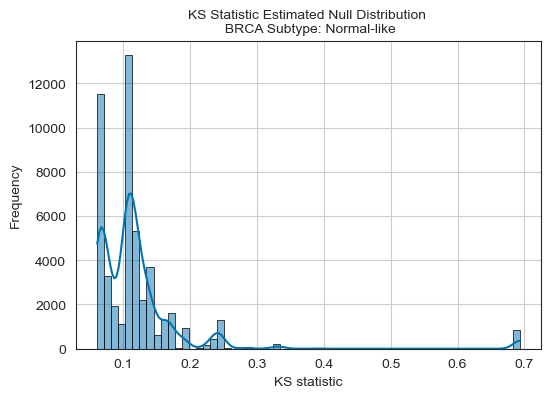

In [259]:
s = "Normal-like" 
permutation_test(survival_time, num_simulation, s)

/Users/tk/opt/anaconda3/envs/gene/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


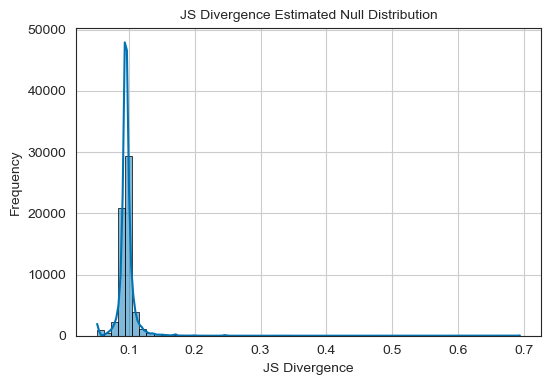

In [240]:
def plot_distribution(list):
    plt.figure(figsize=(6, 4))
    # obs_color = palette[2]
    # min_color = palette[1]
    # max_color = palette[3]
    # Calculate min and max values
    # min = np.min(list)
    # max = np.max(list)
    # Plot histogram with KDE
    sns.histplot(list, bins=60, kde=True, edgecolor='black')
    # plt.axvline(real_val, color=obs_color, linestyle='--', label=f'Observed KS statistic: {real_val:.4f}', linewidth=2) 
    # plt.axvline(min, color=min_color, linestyle='--', label=f'Min simulated KS statistic: {min:.4f}', linewidth=2)
    # plt.axvline(max, color=max_color, linestyle='--', label=f'Max simulated KS statistic: {max:.4f}', linewidth=2) 
    text = f'JS Divergence Estimated Null Distribution' 
    plt.title(f'{text}', fontsize=10)
    plt.xlabel('JS Divergence')
    plt.ylabel('Frequency')
    plt.grid()

def permutation_test(survival_time, num_simulation=1000):
    jsd_sim = []  
    epsilon = 1e-10
    
    for _ in range(num_simulation):   
        # Select a random split index
        split_index = np.random.randint(1, len(survival_time)//2)

        # Shuffle the data
        shuffled_data = survival_time.copy()
        np.random.shuffle(shuffled_data)

        # Divide the data based on the split index
        group1 = shuffled_data[:split_index]
        group2 = shuffled_data[split_index:]

        # Combine both time groups to get all unique time values
        all_times = set(group1).union(set(group2))

        # Calculate the probability distribution for each group
        p = pd.Series(group1).value_counts(normalize=True).reindex(all_times, fill_value=0)
        q = pd.Series(group2).value_counts(normalize=True).reindex(all_times, fill_value=0)
        p = np.clip(p, epsilon, None)
        q = np.clip(q, epsilon, None)
      
        # Compute the average distribution
        m = 0.5 * (p + q)
        
        # Calculate KL Divergences
        KL_P_M = np.sum(p * np.log(p / m))
        KL_Q_M = np.sum(q * np.log(q / m))
        
        # Calculate JS divergence
        JSD = 0.5 * (KL_P_M + KL_Q_M)
        jsd_sim.append(JSD)
    
    # Performing a one-sided test
    # extreme_count = np.sum(np.array(jsd_sim) > obs_stat)
    # p_value = extreme_count / len(jsd_sim)

    # Plot simulation distribution
    plot_distribution(jsd_sim)

permutation_test(survival_time, 60000)